In [6]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics

In [7]:
shapefile = 'data/ne_110m_admin_0_countries.shp'

In [8]:
gdf = gpd.read_file(shapefile)[['ADMIN', 'NAME_PL', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_pl', 'country_code', 'geometry']

In [9]:
gdf.head()

,country,country_pl,country_code,geometry
0,Fiji,Fidżi,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,Sahara Zachodnia,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,Kanada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,Stany Zjednoczone,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


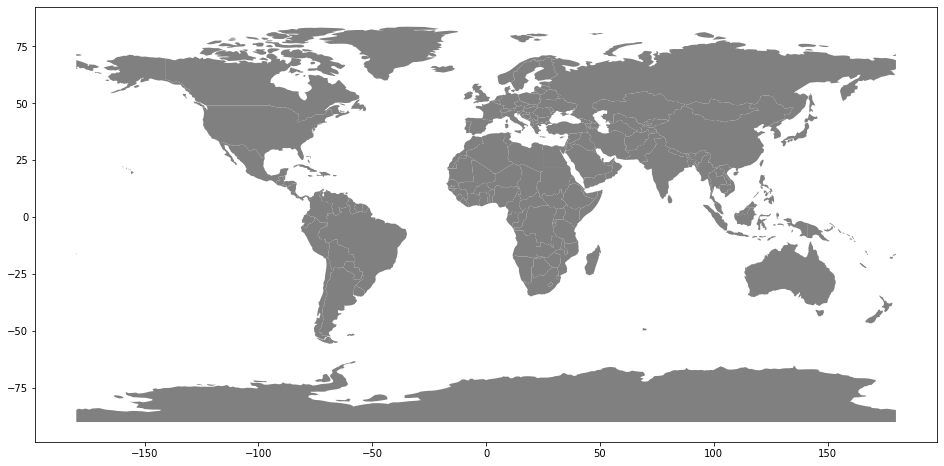

In [10]:
gdf.plot(figsize=(20,8), color="grey")

In [11]:
covid_data = pd.read_csv('data/cases_covid.csv')

In [12]:
merged = gdf.merge(covid_data, left_on = 'country_code', right_on = 'countryterritoryCode')
merged

,country,country_pl,country_code,geometry,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,Fiji,Fidżi,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",05/06/2020,5,6,2020,0,0,Fiji,FJ,FJI,883483.0,Oceania
1,Fiji,Fidżi,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",04/06/2020,4,6,2020,0,0,Fiji,FJ,FJI,883483.0,Oceania
2,Fiji,Fidżi,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",03/06/2020,3,6,2020,0,0,Fiji,FJ,FJI,883483.0,Oceania
3,Fiji,Fidżi,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",02/06/2020,2,6,2020,0,0,Fiji,FJ,FJI,883483.0,Oceania
4,Fiji,Fidżi,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",01/06/2020,1,6,2020,0,0,Fiji,FJ,FJI,883483.0,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,Trinidad and Tobago,Trynidad i Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",17/03/2020,17,3,2020,1,0,Trinidad_and_Tobago,TT,TTO,1389858.0,America
17804,Trinidad and Tobago,Trynidad i Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",16/03/2020,16,3,2020,2,0,Trinidad_and_Tobago,TT,TTO,1389858.0,America
17805,Trinidad and Tobago,Trynidad i Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",15/03/2020,15,3,2020,0,0,Trinidad_and_Tobago,TT,TTO,1389858.0,America
17806,Trinidad and Tobago,Trynidad i Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",14/03/2020,14,3,2020,1,0,Trinidad_and_Tobago,TT,TTO,1389858.0,America


In [13]:
covid_data.describe()

,day,month,year,cases,deaths,popData2018
count,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000,2.123100e+04
mean,15.908340,3.774632,2019.996891,307.109157,18.366362,4.910551e+07
std,9.091345,1.431074,0.055677,1809.646997,123.722299,1.705858e+08
min,1.000000,1.000000,2019.000000,0.000000,0.000000,1.000000e+03
25%,8.000000,3.000000,2020.000000,0.000000,0.000000,2.082958e+06
50%,16.000000,4.000000,2020.000000,3.000000,0.000000,9.485386e+06
75%,24.000000,5.000000,2020.000000,51.000000,1.000000,3.295540e+07
max,31.000000,12.000000,2020.000000,48529.000000,4928.000000,1.392730e+09


In [14]:
max_cases = covid_data["cases"].max()
merged[merged['cases'] == max_cases]

,country,country_pl,country_code,geometry,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
357,United States of America,Stany Zjednoczone,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",26/04/2020,26,4,2020,48529,2172,United_States_of_America,US,USA,327167434.0,America


In [15]:
max_deaths = covid_data["deaths"].max()
merged[merged['deaths'] == max_deaths]

,country,country_pl,country_code,geometry,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
367,United States of America,Stany Zjednoczone,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",16/04/2020,16,4,2020,30148,4928,United_States_of_America,US,USA,327167434.0,America


In [16]:
covid_data[covid_data['countryterritoryCode'] == 'CHN']

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
4226,05/06/2020,5,6,2020,11,0,China,CN,CHN,1.392730e+09,Asia
4227,04/06/2020,4,6,2020,1,0,China,CN,CHN,1.392730e+09,Asia
4228,03/06/2020,3,6,2020,5,0,China,CN,CHN,1.392730e+09,Asia
4229,02/06/2020,2,6,2020,7,0,China,CN,CHN,1.392730e+09,Asia
4230,01/06/2020,1,6,2020,19,0,China,CN,CHN,1.392730e+09,Asia
...,...,...,...,...,...,...,...,...,...,...,...
4379,04/01/2020,4,1,2020,0,0,China,CN,CHN,1.392730e+09,Asia
4380,03/01/2020,3,1,2020,17,0,China,CN,CHN,1.392730e+09,Asia
4381,02/01/2020,2,1,2020,0,0,China,CN,CHN,1.392730e+09,Asia
4382,01/01/2020,1,1,2020,0,0,China,CN,CHN,1.392730e+09,Asia


In [17]:
covid_data[covid_data['countryterritoryCode'] == 'CHN'].head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
4226,05/06/2020,5,6,2020,11,0,China,CN,CHN,1.392730e+09,Asia
4227,04/06/2020,4,6,2020,1,0,China,CN,CHN,1.392730e+09,Asia
4228,03/06/2020,3,6,2020,5,0,China,CN,CHN,1.392730e+09,Asia
4229,02/06/2020,2,6,2020,7,0,China,CN,CHN,1.392730e+09,Asia
4230,01/06/2020,1,6,2020,19,0,China,CN,CHN,1.392730e+09,Asia
4231,31/05/2020,31,5,2020,5,0,China,CN,CHN,1.392730e+09,Asia
4232,30/05/2020,30,5,2020,17,0,China,CN,CHN,1.392730e+09,Asia
4233,29/05/2020,29,5,2020,0,0,China,CN,CHN,1.392730e+09,Asia
4234,28/05/2020,28,5,2020,3,0,China,CN,CHN,1.392730e+09,Asia
4235,27/05/2020,27,5,2020,1,0,China,CN,CHN,1.392730e+09,Asia


In [18]:
covid_data[covid_data['countryterritoryCode'] == 'CHN'].tail(50)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
4334,18/02/2020,18,2,2020,1890,98,China,CN,CHN,1.392730e+09,Asia
4335,17/02/2020,17,2,2020,2052,105,China,CN,CHN,1.392730e+09,Asia
4336,16/02/2020,16,2,2020,2007,142,China,CN,CHN,1.392730e+09,Asia
4337,15/02/2020,15,2,2020,2538,143,China,CN,CHN,1.392730e+09,Asia
4338,14/02/2020,14,2,2020,4156,13,China,CN,CHN,1.392730e+09,Asia
4339,13/02/2020,13,2,2020,15141,254,China,CN,CHN,1.392730e+09,Asia
4340,12/02/2020,12,2,2020,2028,97,China,CN,CHN,1.392730e+09,Asia
4341,11/02/2020,11,2,2020,2490,108,China,CN,CHN,1.392730e+09,Asia
4342,10/02/2020,10,2,2020,2974,97,China,CN,CHN,1.392730e+09,Asia
4343,09/02/2020,9,2,2020,2607,89,China,CN,CHN,1.392730e+09,Asia


In [19]:
covid_data['dateRep'] = pd.to_datetime(covid_data['dateRep'],dayfirst=True)
covid_data_date_index = covid_data.set_index('dateRep')

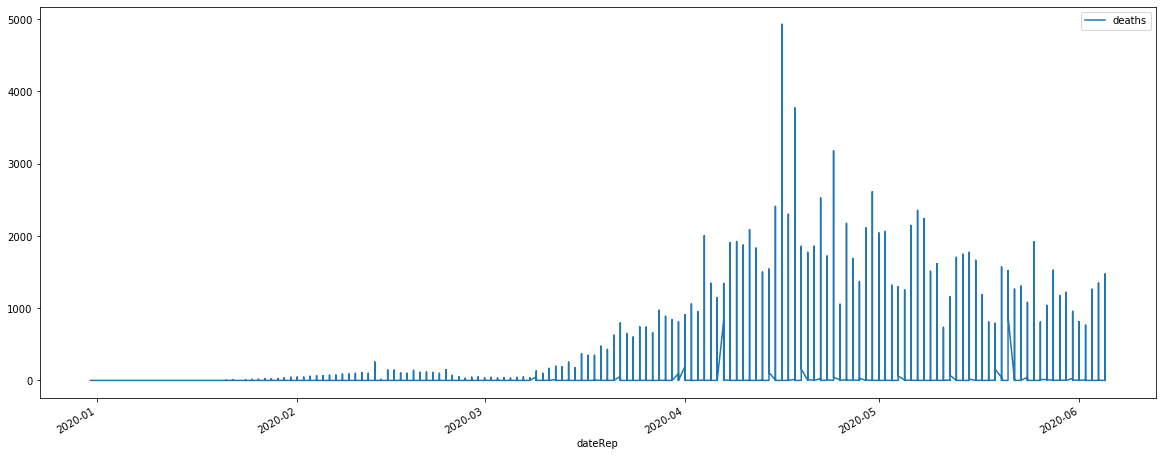

In [20]:
covid_data_date_index.deaths.plot(figsize=(20,8), legend=True)

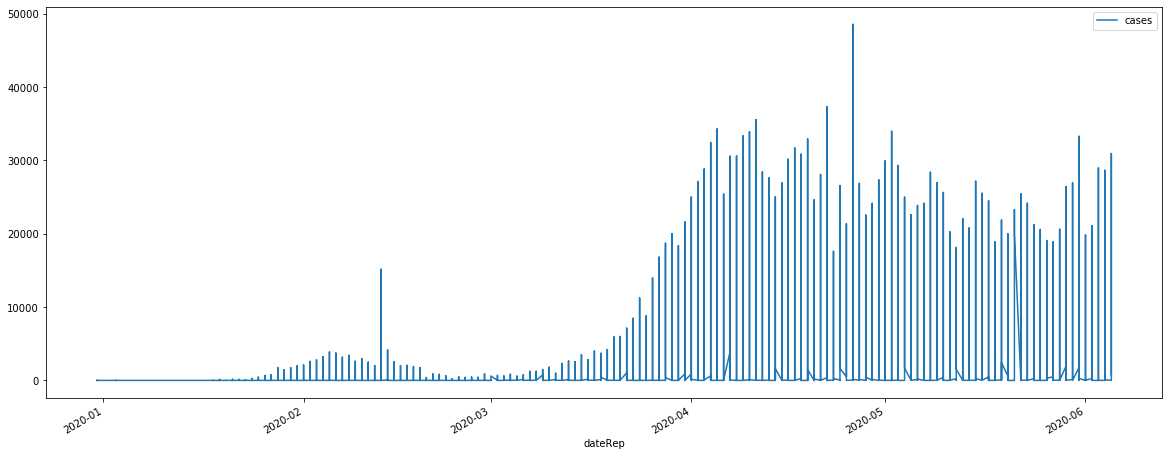

In [21]:
covid_data_date_index.cases.plot(figsize=(20,8), legend=True)

In [22]:
for i in range(1, 6):
    print(i)
    print(merged[merged['month'] == i]['cases'].sum())
    

1
9786
2
74567
3
707860
4
2317247
5
2875075


In [23]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn
import seaborn as sns

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda\envs\myenv

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         122 KB
    certifi-2020.6.20          |           py38_0         157 KB
    openssl-1.1.1h             |       he774522_0         4.8 MB
    seaborn-0.11.0             |             py_0         210 KB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following packages will be UPDATED:

  ca-certificates                                2020.1.1-0 --> 2020.10.14-0
  certifi                                 2020.4.5.2-py38_0 --> 2020.6.20-py38_0
  openssl                                 1.1.1g-he774522_0 --> 1.1.1h-he774522_0
  seaborn                         

In [24]:
covid_data_scaler = pd.read_csv('data/covid_data_scaler.csv')

In [27]:
covid = ['deaths', 'cases']

In [33]:
countries_on_date = merged[merged['dateRep'] == '01/01/2020']['country_code'].tolist()

In [34]:
countries_with_no_data = list(set(all_countries_on_map) - set(countries_on_date))

In [35]:
all_countries_on_map = gdf.country_code.unique()

In [36]:
import sys
!conda install --yes --prefix {sys.prefix} imageio

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda\envs\myenv

  added / updated specs:
    - imageio


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imageio-2.9.0              |             py_0         3.0 MB
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  imageio                                        2.8.0-py_0 --> 2.9.0-py_0




imageio-2.9.0        | 3.0 MB    |            |   0% 
imageio-2.9.0        | 3.0 MB    |            |   1% 
imageio-2.9.0        | 3.0 MB    | 4          |   4% 
imageio-2.9.0        | 3.0 MB    | 7          |   7% 
imageio-2.9.0        | 3.0 MB    | #          |  10% 
imageio-2.9.0        | 3.0 MB    | #2         |  12% 
imageio-2.9.0        | 3.0 MB    | #6         |  16% 
imageio-2.9.

In [37]:
from datetime import datetime
all_dates = covid_data['dateRep'].unique().tolist()
dates = [datetime.strptime(ts, "%d/%m/%Y") for ts in all_dates]
dates.sort()
dates = [datetime.strftime(ts, "%d/%m/%Y") for ts in dates]

TypeError: strptime() argument 1 must be str, not int

In [ ]:
import imageio
images = []
for date in dates:
    # Tworzenie listy krajow dla ktorych brakuje danych dotyczacych covid w danym dniu.
    countries_on_date = merged[merged['dateRep'] == date]['country_code'].tolist()
    countries_with_no_data = list(set(all_countries_on_map) - set(countries_on_date))
    
    # Tworzenie podstawowego wykresu, na ktory beda nanoszone dane dotyczace liczby zgonow.
    fig, ax = plt.subplots(figsize=(20,8))
    merged[merged['dateRep'] == date].plot(column='deaths',  legend=False, ax=ax, cmap="RdYlGn_r")
    
    # Tworzenie dodatkowego obiektu w legendzie, ktory bedzie reprezentowal brak danych.
    no_data_label = mpatches.Patch(color='grey', label='No data')
    plt.legend(handles=[no_data_label], loc='lower center')
    
    plt.title("Daily deaths: " + date)
    plt.axis('off')
    
    # Nanoszenie krajow dla ktorych brakuje danych dotyczacych covid w danym dniu w kolorze szarym.
    for i in countries_with_no_data:
        gdf[gdf['country_code'] == i].plot(ax=ax, color="grey")
        
    # Eksport figur do plikow .png oraz .gif
    filename = (date.replace("/", "_") + "_123.png")
    fig.savefig(filename, dpi=300)
    images.append(imageio.imread(filename))
imageio.mimsave('timelapse_deaths_daily.gif', images)

In [ ]:
# import imageio
# images = []
for date in list_of_dates:
    countries_on_date = merged[merged['dateRep'] == date]['country_code'].tolist()
    countries_with_no_data = list(set(all_countries_on_map) - set(countries_on_date))
    fig, ax = plt.subplots(figsize=(20,8))
    merged['deaths_per_pop'] = merged['deaths']/merged['popData2018']
    merged[merged['dateRep'] == date].plot(column='deaths_per_pop',  legend=True, ax=ax, cmap="RdYlGn_r")
    no_data_label = mpatches.Patch(color='grey', label='No data')
    plt.legend(handles=[no_data_label], loc='lower center')
    plt.axis('off')
    for i in countries_with_no_data:
        gdf[gdf['country_code'] == i].plot(ax=ax, color="grey")
        
        
        
#     filename = (date.replace("/", "_") + "_123.png")
#     fig.savefig(filename, dpi=300)
#     images.append(imageio.imread(filename))
# imageio.mimsave('123.gif', images)

In [ ]:
import imageio
images = []
merged['deaths_per_pop'] = merged['deaths']/merged['popData2018']
for date in dates:
    # Tworzenie listy krajow dla ktorych brakuje danych dotyczacych covid w danym dniu.
    countries_on_date = merged[merged['dateRep'] == date]['country_code'].tolist()
    countries_with_no_data = list(set(all_countries_on_map) - set(countries_on_date))
    
    # Tworzenie podstawowego wykresu, na ktory beda nanoszone dane dotyczace liczby zgonow.
    fig, ax = plt.subplots(figsize=(20,8))
    merged[merged['dateRep'] == date].plot(column='deaths_per_pop', legend=False, ax=ax, cmap="RdYlGn_r")
    
    # Tworzenie dodatkowego obiektu w legendzie, ktory bedzie reprezentowal brak danych.
    no_data_label = mpatches.Patch(color='grey', label='No data')
    plt.legend(handles=[no_data_label], loc='lower center')
    
    plt.title("Daily deaths per country population: " + date)
    plt.axis('off')
    
    # Nanoszenie krajow dla ktorych brakuje danych dotyczacych covid w danym dniu w kolorze szarym.
    for i in countries_with_no_data:
        gdf[gdf['country_code'] == i].plot(ax=ax, color="grey")
        
    # Eksport figur do plikow .png oraz .gif
    filename = ("abc_" + date.replace("/", "_") + ".png")
    fig.savefig(filename, dpi=300)
    images.append(imageio.imread(filename))
imageio.mimsave('2_timelapse_deaths_per_pop_daily.gif', images)

In [ ]:
import imageio
images = []
merged = merged.assign(cumulative_deaths=merged[::-1].groupby('country_code').deaths.cumsum()[::-1])
for date in dates:
    # Tworzenie listy krajow dla ktorych brakuje danych dotyczacych covid w danym dniu.
    countries_on_date = merged[merged['dateRep'] == date]['country_code'].tolist()
    countries_with_no_data = list(set(all_countries_on_map) - set(countries_on_date))
    
    # Tworzenie podstawowego wykresu, na ktory beda nanoszone dane dotyczace liczby zgonow.
    fig, ax = plt.subplots(figsize=(20,8))
    merged[merged['dateRep'] == date].plot(column='cumulative_deaths', legend=False, ax=ax, cmap="RdYlGn_r")
    
    # Tworzenie dodatkowego obiektu w legendzie, ktory bedzie reprezentowal brak danych.
    no_data_label = mpatches.Patch(color='grey', label='No data')
    plt.legend(handles=[no_data_label], loc='lower center')
    
    plt.title("Cumulative deaths for each country: " + date)
    plt.axis('off')
    
    # Nanoszenie krajow dla ktorych brakuje danych dotyczacych covid w danym dniu w kolorze szarym.
    for i in countries_with_no_data:
        gdf[gdf['country_code'] == i].plot(ax=ax, color="grey")
        
    # Eksport figur do plikow .png oraz .gif
    filename = ("abc_" + date.replace("/", "_") + ".png")
    fig.savefig(filename, dpi=300)
    images.append(imageio.imread(filename))
imageio.mimsave('timelapse_cumulative_deaths.gif', images)

In [ ]:
import imageio
images = []
merged = merged.assign(cumulative_cases=merged[::-1].groupby('country_code').cases.cumsum()[::-1])
merged['deaths_per_cases'] = merged['cumulative_deaths']/merged['cumulative_cases']
for date in dates:
    # Tworzenie listy krajow dla ktorych brakuje danych dotyczacych covid w danym dniu.
    countries_on_date = merged[merged['dateRep'] == date]['country_code'].tolist()
    countries_with_no_data = list(set(all_countries_on_map) - set(countries_on_date))
    
    # Tworzenie podstawowego wykresu, na ktory beda nanoszone dane dotyczace liczby zgonow.
    fig, ax = plt.subplots(figsize=(20,8))
    merged[merged['dateRep'] == date].plot(column='deaths_per_cases', legend=False, ax=ax, cmap="RdYlGn_r")
    
    # Tworzenie dodatkowego obiektu w legendzie, ktory bedzie reprezentowal brak danych.
    no_data_label = mpatches.Patch(color='grey', label='No data')
    plt.legend(handles=[no_data_label], loc='lower center')
    
    plt.title("Cumulative deaths per open cases: " + date)
    plt.axis('off')
    
    # Nanoszenie krajow dla ktorych brakuje danych dotyczacych covid w danym dniu w kolorze szarym.
#     for i in countries_with_no_data:
#         gdf[gdf['country_code'] == i].plot(ax=ax, color="grey")
        
    # Eksport figur do plikow .png oraz .gif
    filename = ("abc_" + date.replace("/", "_") + ".png")
    fig.savefig(filename, dpi=300)
    images.append(imageio.imread(filename))
imageio.mimsave('timelapse_deaths_per_cases.gif', images)